Hello, Anton! 🖐
    
My name is Arina Uksusova and I am glad to be your reviewer in this project!<br />

You can find my comments in <font color='green'>green</font>, <font color='yellow'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this</div>
    
OK, now let's go!😏
</font>

# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

First, we are analyzing the data and determining which data is missing.
We will try to understand the reason why the data is missing and try to recover the data.
Next, let's remove the duplicated records, add the columns missing for analysis, analyze the charts and draw a conclusion on what affects the price of the car.

<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b> It is really good that you start your project with the short intro, but it is also crucially important to create a content plan with the main steps of your project and it is better to fis the main aim and tasks of the analysis. As a way to construct your content plan you can use Markdown notation and format of clickabale links.
    <a href="https://coderoad.ru/11948245/Markdown-для-создания-страниц-и-оглавления" title="Markdown ">Here </a> you can find some useful materials😎    
<a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Markdown ">And one more</a> great material for effective using of Markdown!
</div>

### Step 1. Open the data file and study the general information. 

In [1]:
#connect all the modules that we will use in our work
import pandas   as pd
import numpy    as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

vehicles = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
#analyze the data structure
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [2]:
vehicles.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

### Conclusion

There are missing values in five columns. Let's consider the reason why this happened and try to recover the data.

### Step 2. Data preprocessing

**1.
Column "is_4wd"**.

**25572** records were filled out from **51525**. 
After analyzed the table, we can conclude that most of the missing data are records for *sedan*, *coupe*, *mini-van*, *hatchback*, ie types of cars that most likely do not have a 4wd drive system. I will assign all missing entries to **0**, which means **False**.

**2.
Column "paint_color"**.

**42258** records were filled out from **51525**. 
To check whether these values are deliberately missing for a certain type of machines, I have created a pivot table. 
After analyzed the data, I came to the conclusion that the values are missing in all types of cars, I did not find a pattern according to which these values were missing. I don't think it's possible to restore the true values, and I suggest replacing the missing values with **'other'**. Also, if we convert the values to a numerical analogue, then by building `.plot (kind = 'scatter')` we will see that the color has practically no effect on the value of the car.

In [3]:
#par.1 column "is_4wd"
#replace Nan to 0 (False)
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(value = 0)
#ad['is_4wd'].value_counts()

#par.2 column "paint_color"
# replace Nan to 'other'
vehicles['paint_color'] = vehicles['paint_color'].fillna(value = 'other')

**3.**
The column **"model_year"** is missing **7%** of the data (**3619**). The data in this column is very valuable for us, as it is one of the main factors affecting the price of a car. We need to either delete records with missing values or try to restore based on the average age of the car, model and price.

I tried to restore the vehicle's year. To do this, I was looking for very similar records, where there will be matches in the columns: **model**, **condition**, **fuel**, **transmission** and **price**.
As a result, **4.5%** of the records were restored.
I deleted the records with unrecovered data (**1351**), since they will interfere with the analysis of the data in the future.

We also need to check that the date of manufacture of the car is not later than the date of publication of the advertisement

Since the values from the **"model"** column will be used for data recovery, we need to remove the duplicate spelling of the same model. For example: **"ford f-150"** and **"ford f150"**

However, there are many records where the name is very similar, but still these are different configurations, and this can affect the price of the car. For example: **"jeep wrangler"** and **"jeep wrangler unlimited"**




In [4]:
#par.3 column "model_year"

vehicles['model'] = vehicles['model'].replace('ford f150', 'ford f-150')
vehicles['model'] = vehicles['model'].replace('ford f250', 'ford f-250')
vehicles['model'] = vehicles['model'].replace('ford f250 super duty', 'ford f-250 sd')
vehicles['model'] = vehicles['model'].replace('ford f-250 super duty', 'ford f-250 sd')
vehicles['model'] = vehicles['model'].replace('ford f350 super duty', 'ford f-350 sd')
vehicles['model'] = vehicles['model'].replace('jeep cherokee', 'jeep grand cherokee')

def fill_nan(selection):    
    
    # I expect to see RuntimeWarnings in this block
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        if len(selection) == 0:
            return np.nan        
        else :
            return selection.median()


vehicles['model_year'] = vehicles['model_year'].fillna(
    vehicles
    .groupby(['model','condition','fuel','price','transmission'])['model_year']
    .transform(fill_nan)
)
vehicles.dropna(subset = ['model_year'], inplace = True)

#Checking if the date of car manufacture is less than the date of publication of the ad
vehicles['year'] = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.year
vehicles['model_year'] = (
    vehicles['model_year']
    .where(vehicles['model_year'] <= vehicles['year'], vehicles['year'])
    
)

print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50206 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50206 non-null  int64  
 1   model_year    50206 non-null  float64
 2   model         50206 non-null  object 
 3   condition     50206 non-null  object 
 4   cylinders     45081 non-null  float64
 5   fuel          50206 non-null  object 
 6   odometer      42506 non-null  float64
 7   transmission  50206 non-null  object 
 8   type          50206 non-null  object 
 9   paint_color   50206 non-null  object 
 10  is_4wd        50206 non-null  float64
 11  date_posted   50206 non-null  object 
 12  days_listed   50206 non-null  int64  
 13  year          50206 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.7+ MB
None


    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Great job! You have demonstrated a very thoughtful and precise approach to dealing with missing data. It's also very cool that you have constructed your own functions to complete this task. Keep it up!
</div>

**4. Column "cylinders"**.

I think the seller himself often does not know how many cylinders there are in his car, so this value was not entered in **10%**(**5260**) of ads. To fill in the missing data, I grouped the table by the columns **['model', 'model_year']** and this allowed us to recover almost **100%** of the data


In [5]:
#par4. column "cylinders"
vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles
    .groupby(['model','model_year'])['cylinders']
    .transform(fill_nan)
)
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50206 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50206 non-null  int64  
 1   model_year    50206 non-null  float64
 2   model         50206 non-null  object 
 3   condition     50206 non-null  object 
 4   cylinders     50170 non-null  float64
 5   fuel          50206 non-null  object 
 6   odometer      42506 non-null  float64
 7   transmission  50206 non-null  object 
 8   type          50206 non-null  object 
 9   paint_color   50206 non-null  object 
 10  is_4wd        50206 non-null  float64
 11  date_posted   50206 non-null  object 
 12  days_listed   50206 non-null  int64  
 13  year          50206 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.7+ MB
None


**5.
Column "odometer"**.

**"Odometer"** is an important parameter that interests the buyer, first of all, along with the type of car, year of manufacture and price.
Initially, **15.5%** (**7696**) data was lost.
When recovering data, I came across a situation that when I recover data with high accuracy, I can recover only **7%** of the data (**3412**).
As a result, I decided to recover the data in **3** iteration with a gradual loss of accuracy. As a result, we managed to recover **100%** of the data. **1%** of the data was obtained with low accuracy. This data could either be deleted or left. I decided not to delete.

I think that when restoring **"odometer"** data, we need to analyze not the **date of manufacture** of the car, but its **age** at the time of publication of the ad.

In addition to **7696** **"NaN"** records, the table also contains **240** records with **odometer = "0"**.
For new cars this may be true, but for old cars it means the data is not correct.
We will process all zero values in the same way as **"NaN"**.


In [6]:
#par5. odometer

vehicles['age']  = vehicles['year'] - vehicles['model_year']
vehicles.loc[(vehicles['odometer'] == 0) & (vehicles['age'] > 1),'odometer'] = np.nan


#start position. vehicles['odometer'].count() = 42478
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles
    .groupby(['model','age','transmission','fuel','condition','price'])['odometer']
    .transform(fill_nan)
)
#after step 1. vehicles['odometer'].count() = 45159
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles
    .groupby(['model','age','transmission','fuel','condition'])['odometer']
    .transform(fill_nan)
)
#after step 2. vehicles['odometer'].count() = 49577
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles
    .groupby(['model','age'])['odometer']
    .transform(fill_nan)
)
#after step 3. vehicles['odometer'].count() = 50072
vehicles.dropna(subset = ['cylinders','odometer'], inplace = True)
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50072 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50072 non-null  int64  
 1   model_year    50072 non-null  float64
 2   model         50072 non-null  object 
 3   condition     50072 non-null  object 
 4   cylinders     50072 non-null  float64
 5   fuel          50072 non-null  object 
 6   odometer      50072 non-null  float64
 7   transmission  50072 non-null  object 
 8   type          50072 non-null  object 
 9   paint_color   50072 non-null  object 
 10  is_4wd        50072 non-null  float64
 11  date_posted   50072 non-null  object 
 12  days_listed   50072 non-null  int64  
 13  year          50072 non-null  int64  
 14  age           50072 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 6.1+ MB
None


In total, we managed to recover with an acceptable accuracy of **97.5%** (**50072**) of the data, which I think is not bad.

#### Looking for duplicates and anomalies.

No duplicate records found in the table.

It was also found that **36%** (**18089**) of ads differ only by the date of publication, i.e. they were placed several times.
On the one hand, these are completely different ads if our goal is to analyze ads. On the other hand, we analyze what factors influence the price of a car and it would be a mistake to analyze the same ads.

Also, **406** ads have a price of less than **500** dollars. I think this is incorrect data and ads with a price of less than **500$** need to be removed.


In [7]:
print('Duplicated records = ',vehicles.duplicated().sum())

print(len(vehicles[vehicles.duplicated(
    subset=['price','model_year','model','condition','cylinders','odometer','transmission','type'], keep=False)])
    ,'ads were posted several times'  
)

vehicles = vehicles.sort_values(by = 'date_posted')
vehicles.drop_duplicates(subset=['price','model_year','model','condition','cylinders','odometer','transmission','type'], keep= 'last', inplace=True)
print(vehicles[vehicles.duplicated(subset=['price','model_year','model','condition','cylinders','odometer','transmission','type'], keep=False)].count())


vehicles.drop(vehicles[((vehicles['price'] < 500))].index , inplace=True)
vehicles.reset_index(drop=True)


Duplicated records =  0
18089 ads were posted several times
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
year            0
age             0
dtype: int64


price  model_year              model  condition  cylinders    fuel  \
0       2500      2007.0       honda accord       good        4.0     gas   
1      13995      2004.0           ram 2500  excellent        6.0  diesel   
2      21900      2011.0           ram 2500  excellent        8.0     gas   
3       3999      2003.0     hyundai sonata  excellent        4.0     gas   
4       6000      2006.0       chrysler 300  excellent        8.0     gas   
...      ...         ...                ...        ...        ...     ...   
37063   5900      2010.0         ford focus  excellent        4.0     gas   
37064   5990      2008.0      ford explorer       good        6.0     gas   
37065   5200      2010.0        ford fusion       good        6.0     gas   
37066   7495      2010.0  chevrolet equinox       good        4.0     gas   
37067  19500      2012.0         ford f-150  excellent        8.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
0      231000.0    automatic   sedan        blue     0.0  2018-05-01   
1      197980.0    automatic  pickup        grey     1.0  2018-05-01   
2       90000.0    automatic   truck       other     1.0  2018-05-01   
3       82000.0    automatic   sedan       other     0.0  2018-05-01   
4       12500.0    automatic   sedan        grey     0.0  2018-05-01   
...         ...          ...     ...         ...     ...         ...   
37063   85109.0    automatic   sedan       white     0.0  2019-04-19   
37064  137809.0    automatic     SUV       black     1.0  2019-04-19   
37065  129000.0    automatic   sedan         red     0.0  2019-04-19   
37066     116.0    automatic   wagon       black     0.0  2019-04-19   
37067  105800.0    automatic   truck         red     1.0  2019-04-19   

       days_listed  year   age  
0               14  2018  11.0  
1               31  2018  14.0  
2               23  2018   7.0  
3               60  2018  15.0  
4               39  2018  12.0  
...            ...   ...   ...  
37063           32  2019   9.0  
37064           56  2019  11.0  
37065           49  2019   9.0  
37066           34  2019   9.0  
37067           77  2019   7.0  

[37068 rows x 15 columns]

In the next columns **['model_year', 'cylinders', 'odometer', 'is_4wd', 'age']** we must change the data type to **Int64**, since the data used in them is always integer. 

I also used a **try-except** construct to avoid crashes.

In [8]:
try: 
    vehicles['model_year'] = vehicles['model_year'].astype('int')
    vehicles['cylinders']  = vehicles['cylinders'].astype('int')
    vehicles['odometer']   = vehicles['odometer'].astype('int')
    vehicles['is_4wd']     = vehicles['is_4wd'].astype('int')
    vehicles['age']        = vehicles['age'].astype('int')
except: 
    print('Data conversion failed ((')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37068 entries, 17818 to 29240
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         37068 non-null  int64 
 1   model_year    37068 non-null  int64 
 2   model         37068 non-null  object
 3   condition     37068 non-null  object
 4   cylinders     37068 non-null  int64 
 5   fuel          37068 non-null  object
 6   odometer      37068 non-null  int64 
 7   transmission  37068 non-null  object
 8   type          37068 non-null  object
 9   paint_color   37068 non-null  object
 10  is_4wd        37068 non-null  int64 
 11  date_posted   37068 non-null  object
 12  days_listed   37068 non-null  int64 
 13  year          37068 non-null  int64 
 14  age           37068 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.5+ MB


    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Ok, Anton, it is great peace of work. You have managed to deal with missing values using different tools and code techniques. I also want to highlight your very understandable and concrete explanations/argumentation/conclusions/hypotheses about the reason for the occurrence of the missing values at each micro-step of this part of the analysis. Impressive staff!
</div>

### Step 3. Make calculations and add them to the table

In [9]:
vehicles['day_of_week'] = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.weekday
vehicles['month']       = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.month

#columns vehicles['year'] and vehicles['age']  were created in the second step.    
vehicles['km_per_year'] = (
    vehicles['odometer']
    .where(vehicles['age'] == 0 , round(vehicles['odometer'] / vehicles['age'])))

condition_dict = {
 'new'       : 5,
 'like new'  : 4,
 'excellent' : 3,
 'good'      : 2,
 'fair'      : 1,
 'salvage'   : 0
}

vehicles['condition'] = vehicles['condition'].replace(condition_dict)
vehicles.head()

price  model_year           model  condition  cylinders    fuel  \
17818   2500        2007    honda accord          2          4     gas   
3389   13995        2004        ram 2500          3          6  diesel   
1217   21900        2011        ram 2500          3          8     gas   
27589   3999        2003  hyundai sonata          3          4     gas   
34161   6000        2006    chrysler 300          3          8     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
17818    231000    automatic   sedan        blue       0  2018-05-01   
3389     197980    automatic  pickup        grey       1  2018-05-01   
1217      90000    automatic   truck       other       1  2018-05-01   
27589     82000    automatic   sedan       other       0  2018-05-01   
34161     12500    automatic   sedan        grey       0  2018-05-01   

       days_listed  year  age  day_of_week  month  km_per_year  
17818           14  2018   11            1      5        21000  
3389            31  2018   14            1      5        14141  
1217            23  2018    7            1      5        12857  
27589           60  2018   15            1      5         5467  
34161           39  2018   12            1      5         1042

I added three columns to the table **['day_of_week', 'month', 'km_per_year']** and replaced the value of the **"condition"** column with a numeric value.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Correct decision here!
</div>

### Step 4. Carry out exploratory data analysis

We will build graphs based on the data from the table, find outliers, anomalous values and analyze what factors affect the price and publication time of the ad.

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

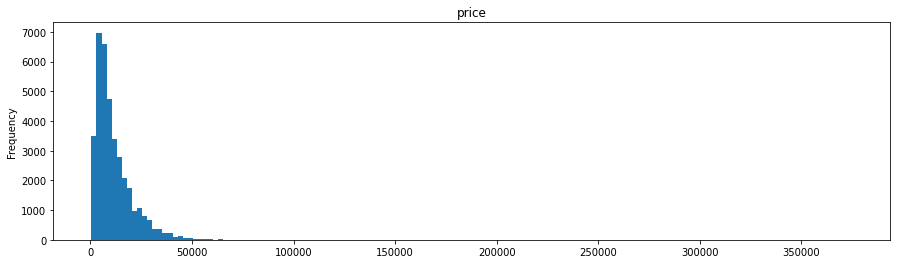

In [10]:
vehicles['price'].plot(
    kind     = 'hist'
    ,title   = 'price'
    ,bins    = 150
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

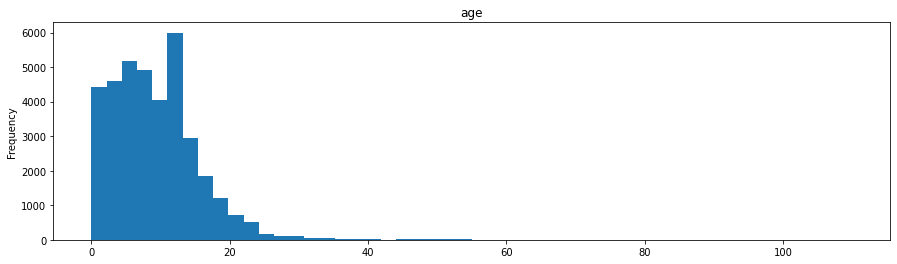

In [11]:
vehicles['age'].plot(
    kind     = 'hist'
    ,title   = 'age'
    ,bins    = 50
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'odometer'}, ylabel='Frequency'>

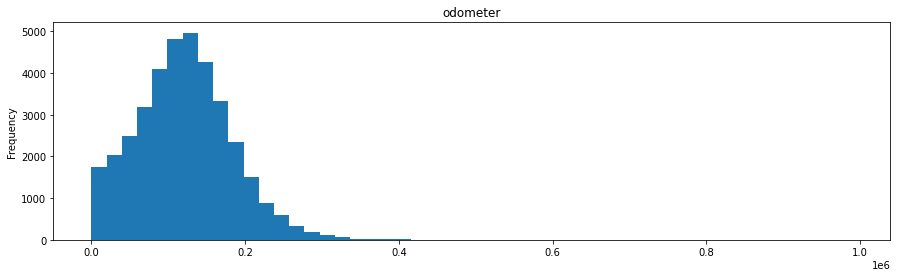

In [12]:
vehicles['odometer'].plot(
    kind     = 'hist'
    ,title   = 'odometer'
    ,bins    = 50
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'cylinders'}, ylabel='Frequency'>

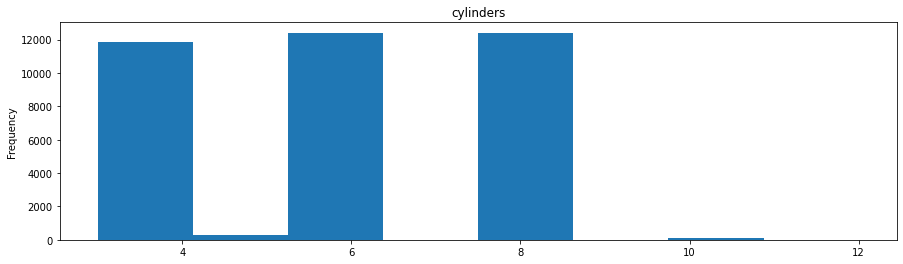

In [13]:
vehicles['cylinders'].plot(
    kind     = 'hist'
    ,title   = 'cylinders'
    ,bins    = 8
    ,figsize = (15, 4))

A histogram of the **"Comb Distribution"** type. No anomalies or emissions were found here. The graph shows that **30%** of cars have **4** cylinders, the same percentage of cars have **6** or **8** cylinders. And **5,10,12** cylinders are very rare.

<AxesSubplot:title={'center':'condition'}, ylabel='Frequency'>

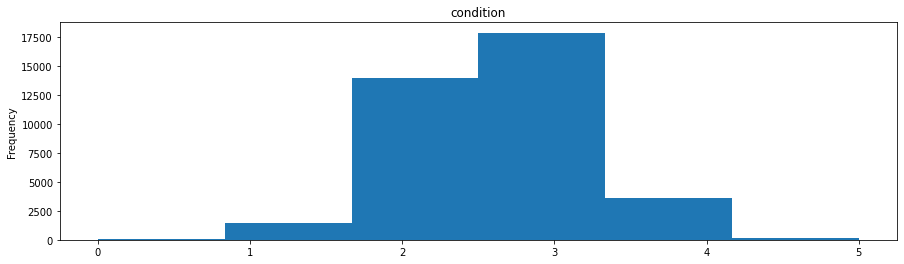

In [14]:
vehicles['condition'].plot(
    kind     = 'hist'
    ,title   = 'condition'
    ,bins    = 6
    ,figsize = (15, 4))

A histogram of the "Normal Distribution" type. There are practically no new cars and "salvage".






The histograms plotted for the **'price'**, **'age'**, **'odometer'** parameters do not look very informative. The graph is heavily shifted to the left, due to the existing emissions. While for 'cylinders' and **'condition'**, the histograms look quite informative.

We will use the **"box-and-whisker"** method to determine borders of outliers.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> To some extent you are right that histograms are not very rich in terms of content, they provide us with. But these graphs are important too, and it's great that you plotted them and examined the data with this type of graph. I would also like to note the formatting of the plots, you made the right step when you added a title to the graph and the name of the axes. Visualization is the business card of the project, it should be as clear and readable!
</div>


In [15]:
def outliers_lower_upper(column):
    q1 = vehicles[column].quantile(0.25)
    q3 = vehicles[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)    

price_outliers    = outliers_lower_upper('price')
age_outliers      = outliers_lower_upper('age')
odometer_outliers = outliers_lower_upper('odometer')

print('Outliers limit "price"    ',price_outliers)
print('Outliers limit "age"      ',age_outliers)
print('Outliers limit "odometer" ',odometer_outliers)

Outliers limit "price"     (0, 30005.0)
Outliers limit "age"       (0, 25.0)
Outliers limit "odometer"  (0, 281517.5)


Let's transfer the outliers to a separate table.

In [16]:

indexNames = vehicles[((vehicles['price'] >= price_outliers[1]) | (vehicles['age'] >= age_outliers[1]) | (vehicles['odometer'] >= odometer_outliers[1]))].index
vehicles_outliers = vehicles.loc[indexNames]
vehicles.drop(indexNames , inplace=True)
vehicles.reset_index(drop=True) # I dont know. Is it necessary or not

print('Filtered {:} records '.format(len(vehicles_outliers)))
print('There are {:} records in the "vehicles" table'.format(len(vehicles)))

Filtered 2770 records 
There are 34298 records in the "vehicles" table


Let's build histograms based on the filtered data.

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

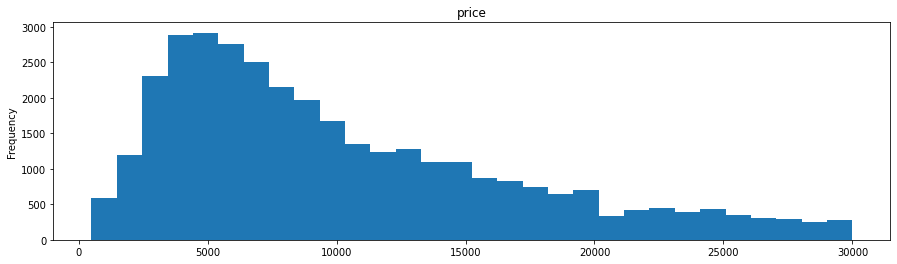

In [17]:
#Let's make "bins = 30", since the price range is from 0 to 30005
vehicles['price'].plot(
    kind     = 'hist'
    ,title   = 'price'
    ,bins    = 30
    ,figsize = (15, 4))

Without outliers, the histogram is much more informative. This histogram is of **"Right Skewed Distribution"** type. We see that most of the ads with a price of **3000-5000**. Next there is a systematic decrease in the number of offers. After **20,000**, a plateau is observed. We also see a local surge with a price of **19500 - 19999**, and a sharp drop of **20000-21000**. I will assume that this is due to the fact that the seller, wanting to sell the car for **20000**, sets the price slightly lower (for example, **19500** or **19999**) to make the ad more attractive. I expected a similar situation with the price of **10000**, but this is not observed.

<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

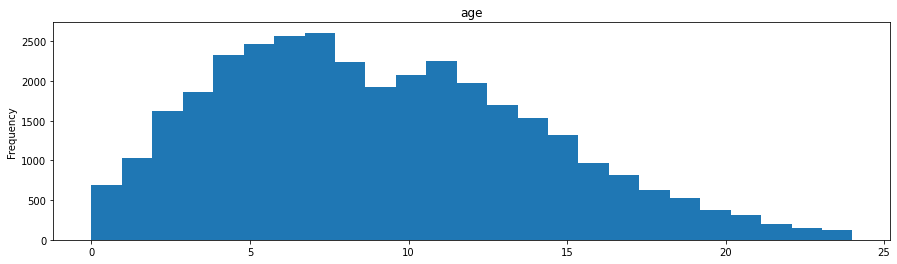

In [18]:
vehicles['age'].plot(
    kind     = 'hist'
    ,title   = 'age'
    ,bins    = 25
    ,figsize = (15, 4))

By plotting a histogram based on the age of the vehicle, we see a **"Two-Peak Distribution"**. Most of the cars sell are **7** years old. Then there is a gradual decline. Also there is a second peak at **11** years.


<AxesSubplot:title={'center':'odometer'}, ylabel='Frequency'>

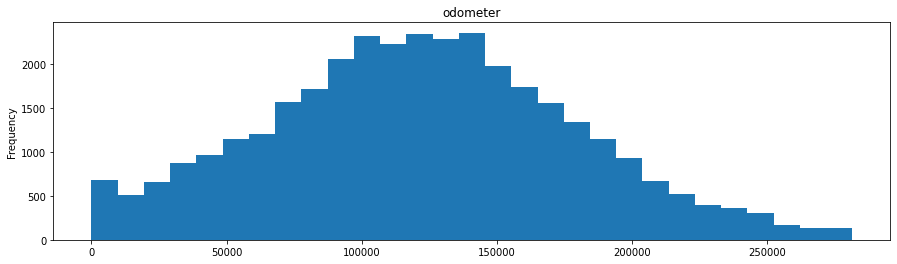

In [19]:
vehicles['odometer'].plot(
    kind     = 'hist'
    ,title   = 'odometer'
    ,bins    = 29
    ,figsize = (15, 4))

This histogram is of **"Normal Distribution"** type with **"Edge Peak Distribution"**. The presence of **"Edge Peak"** on the right speaks about incorrectly entered data, we need to analyze and correct the data.

Upon analysis, it was found that many older vehicles have mileage **1000** times less then  average for a similar age. 

Let's correct the data.

<AxesSubplot:title={'center':'odometer'}, ylabel='Frequency'>

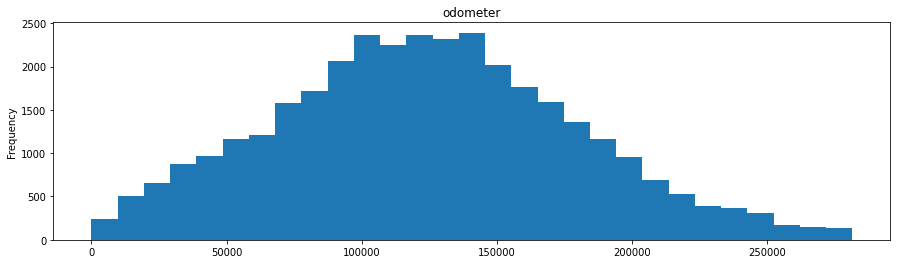

In [20]:

vehicles.loc[(vehicles['odometer'] <= odometer_outliers[1]/1000) & (vehicles['age'] > 1),'odometer'] = vehicles['odometer']*1000

vehicles.drop(vehicles[(vehicles['odometer'] < 1000) & (vehicles['age'] > 1)].index , inplace=True)
vehicles.reset_index(drop=True)

vehicles['odometer'].plot(
    kind     = 'hist'
    ,title   = 'odometer'
    ,bins    = 29
    ,figsize = (15, 4))

The right peak disappeared as we corrected the data.
This histogram is of the **"Normal Distribution"** type.
Peak **100000** - **140,000** has a plateau appearance.

Having built the histograms, we see the normal distribution of the data, which means we have processed outliers and anomalies.

#### Let's examine the duration of ad impressions.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Anton, you are really good at the types of distribution! It is really great that you have focused on it and pointed out the difference between all these cases.
</div>


In [21]:
print(vehicles.corr()['days_listed'])

price         -0.003258
model_year    -0.001236
condition     -0.001660
cylinders      0.003201
odometer       0.007694
is_4wd         0.003474
days_listed    1.000000
year           0.006844
age            0.001939
day_of_week    0.000011
month         -0.007085
km_per_year   -0.001660
Name: days_listed, dtype: float64


After analyzing the correlation with other ad parameters, I came to the conclusion that ad display duration is not related in any way to car parameters. No correlation with price was also found, although initially I assumed that the lower the price, the shorter the ad display time.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Ok, it is absolutely normal when our hypotheses are not supported by the results of statistical analysis. But it is important to keep in mind that correlation depicts only the correlation is not causation! And this phrase means that just because two things correlate does not necessarily mean that one causes the other. That is why we should be more careful when using correlations that show some kind of relationship between our variables, but do not state a causal relationship👀
</div>

In [22]:
print('Mean "days_listed" is {:0.1f} days '.format(vehicles['days_listed'].mean()))
print('Median "days_listed" is {:0.1f} days'.format(vehicles['days_listed'].median()))
vehicles['days_listed'].describe()

Mean "days_listed" is 39.5 days 
Median "days_listed" is 33.0 days


count    34291.000000
mean        39.490858
std         28.137493
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

We can see that the ad was shown in an interval from **0** to **271** days.

mean  = 39.5 days

median = 33 days

<AxesSubplot:title={'center':'days_listed'}, ylabel='Frequency'>

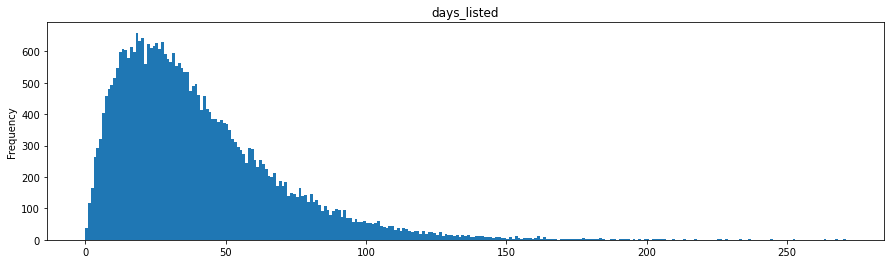

In [23]:
vehicles['days_listed'].plot(
    kind     = 'hist'
    ,title   = 'days_listed'
    ,bins    = 271
    ,figsize = (15, 4))

Let's determine the boundaries of outliers and build a histogram based on data without outliers.

In [24]:
days_listed_outliers    = outliers_lower_upper('days_listed')

print('Outliers limit "days_listed"    ',days_listed_outliers)
print('{:} ads displayed for 0 day'.format(len(vehicles.query('days_listed == 0'))))
print('{:} ads displayed for more than {:.0f} days'.format(len(vehicles.query('days_listed > @days_listed_outliers[1]')),days_listed_outliers[1]))

Outliers limit "days_listed"     (0, 104.0)
39 ads displayed for 0 day
1085 ads displayed for more than 104 days


<AxesSubplot:title={'center':'days listed'}, ylabel='Frequency'>

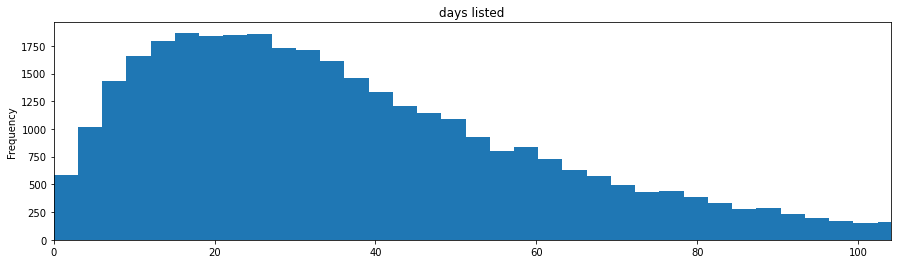

In [25]:
vehicles['days_listed'].plot(
    kind     = 'hist'
    ,title   = 'days listed'
    ,bins    = 90
    ,figsize = (15, 4)
    ,xlim=(0, 104)
)

This histogram is of **"Right Skewed Distribution"** type. The peak is in the form of a plateau.
We can see that the most ads were shown with **12**-**33** days.

Let's build **HEXBIN** graphs to estimate the dependence of the publication duration on **price**, **age**, **mileage**

/Applications/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='days_listed', ylabel='age'>

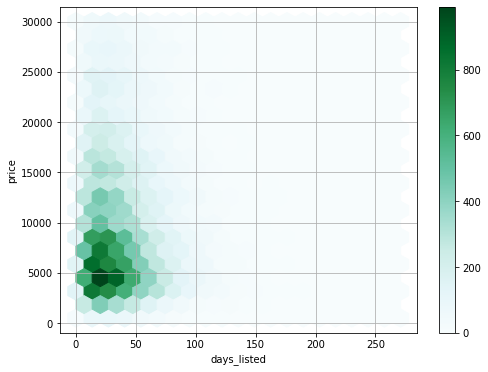

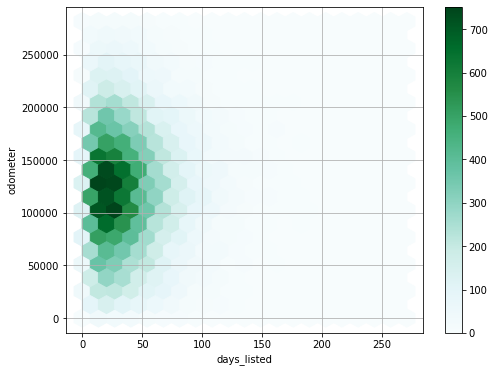

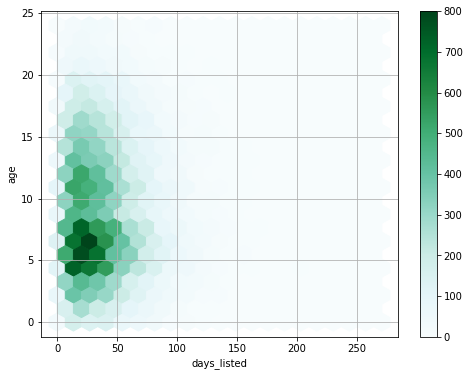

In [26]:
vehicles.plot(x='days_listed', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
vehicles.plot(x='days_listed', y='odometer', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
vehicles.plot(x='days_listed', y='age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


No dependence of publication duration on **price**, **age** or **mileage** was found ((


It would also be interesting to see if the publication time depends on the **month** when it came out.

Let's build a graph.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Well, you have got very interesting and curious conclusions. But there is nothing wrong with the fact that the analysis not showing a connection, it is absolutely normal.
</div>

<AxesSubplot:xlabel='month'>

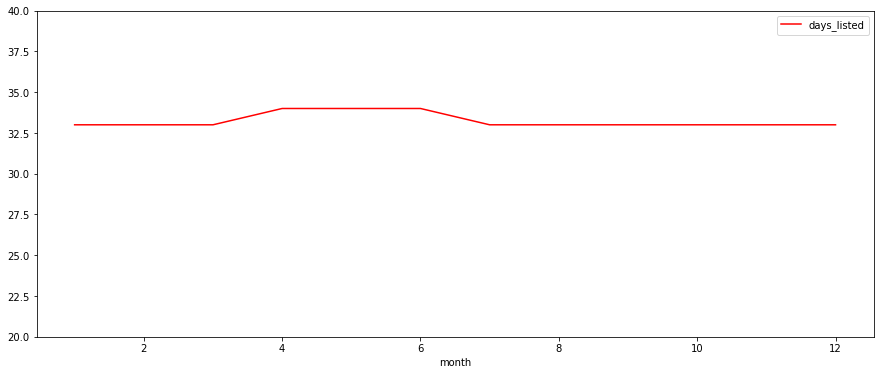

In [27]:
month_median = vehicles.pivot_table(index = 'month', values = 'days_listed', aggfunc = 'median')
month_median.plot(figsize=(15, 6),color='Red', ylim = (20,40), label='Month / Days listed')


Unfortunately, the dependence of the publication duration on the month was also not found. The duration is approximately the same in each month.

However, it was noticed that the number of ads strongly depends on the month. There are fewer ads in summer, more in winter.

In [28]:
month_count = vehicles.pivot_table(index = 'month', values = 'days_listed', aggfunc = 'count')
month_count['name'] = month_count.index.values
month_dict = {10: 'October', 11: 'November', 12: 'December', 1: 'January',2:'February',3:'March',4:'April', 5: 'May',6:'June',7:'July',8:'August',9:'September'}
month_count['name'] = month_count['name'].replace(month_dict)
print(month_count)

fig = px.line_polar(month_count, r = 'days_listed',theta='name', line_close=True, title='Distribution of the number of ads by month')
fig.update_traces(fill='toself')
fig.show()

       days_listed       name
month                        
1             3097    January
2             2914   February
3             3580      March
4             2380      April
5             2502        May
6             2467       June
7             2671       July
8             2757     August
9             2769  September
10            3065    October
11            2937   November
12            3152   December


    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Wow, you have built the amazing graph!
</div>

Let's analyze the ads that have been placed for less than 3 days.

In [29]:
vehicles['ad_short_time'] = vehicles['days_listed'] < 3

ad_short_time = (
    vehicles
    .pivot_table(index = ['model','age','type']
    ,values = ['ad_short_time'])   
)
only_quick_ad = ad_short_time.query('ad_short_time > 0.5')
only_quick_ad

ad_short_time
model                   age type                      
ford explorer           16  wagon                  1.0
jeep wrangler unlimited 8   convertible            1.0
nissan maxima           2   truck                  1.0
ram 1500                23  wagon                  1.0
toyota rav4             3   hatchback              1.0
toyota tacoma           3   offroad                1.0

It was not possible to find confirmation that cars of a certain brand and age are in great demand, and as soon as they are put up for sale, a buyer is immediately found. There are only 6 such ads.

Maybe the fast selling cars had a grossly understated selling price?

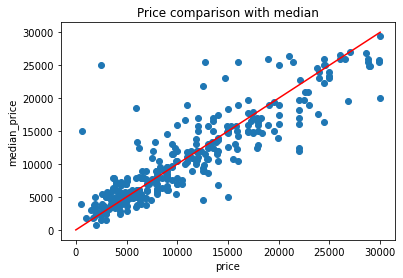

In [30]:
#create table with short displayed ad
vehicles['median_price'] = (
    vehicles
    .groupby(['model','age'])['price']
    .transform(fill_nan)
)

ad_short_price = vehicles.query('days_listed < 3')
ad_short_price

# create a spread with a center line
fig, ax = plt.subplots()
ax.scatter(ad_short_price['price'], ad_short_price['median_price'])

#plt(num=None, figsize=(8, 8))
plt.rcParams["figure.figsize"] = (8,8)
ax.plot([0, 30000], [0, 30000], c='r')    
plt.title("Price comparison with median")
plt.xlabel("price")
plt.ylabel("median_price")
plt.show()

The red line marks the balance line to make it easier to analyze. Having built the **"price"** / **"median price"** chart, we can see that the fast ads had a price both **below** the median and **above**.

Let's count how many ads were with a price below the median, and how many above

In [31]:
count_short_ad = len(ad_short_price) #319
count_short_ad_price_low = len(ad_short_price.query('price < median_price')) #140
count_short_ad_price_high = len(ad_short_price.query('price > median_price')) #158
# 21 ads equal
print('In {:0.0f} ads, the price is above average.'.format(count_short_ad_price_high))
print('In {:0.0f} ads, the price is below average.'.format(count_short_ad_price_low))



In 158 ads, the price is above average.
In 140 ads, the price is below average.


**140** ads had a below average price, and **158** ads were higher. It can be concluded that the price does not affect quick ads.


Let's analyze the ads that have been posted for more than **104** days. Maybe there are brands for which it is very difficult to find a buyer, or the price in these ads is above average? 

Let's check these hypotheses.

In [32]:
vehicles['ad_long_time'] = vehicles['days_listed'] > 104

ad_long_time = (
    vehicles
    .pivot_table(index = ['model','age','type']
    ,values = ['ad_long_time'])   
)
only_long_ad = ad_long_time.query('ad_long_time > 0.5')
print('There are {:.0f} long ads'.format(len(ad_long_time)))
print('{:.0f} ads are displayed only for a long time'.format(len(only_long_ad)))


There are 3447 long ads
36 ads are displayed only for a long time


Only **1%** of long ads are unique. Thus, the hypothesis that there are types of cars that are very difficult to sell was not confirmed. 

Let's check the selling price.



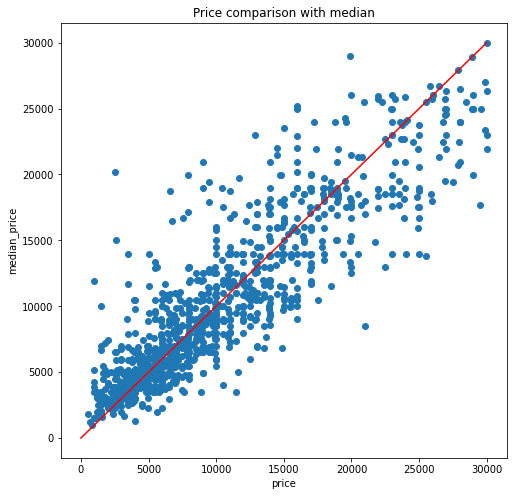

In [33]:
#create table with long displayed ad
ad_long_price = vehicles.query('days_listed > 104')
ad_long_price

# create a spread with a center line
fig, axL = plt.subplots()
axL.scatter(ad_long_price['price'], ad_long_price['median_price'])

# plt(num=None, figsize=(8, 8))
plt.rcParams["figure.figsize"] = (8,8)
axL.plot([0, 30000], [0, 30000], c='r')    
plt.title("Price comparison with median")
plt.xlabel("price")
plt.ylabel("median_price")
plt.show()

The red line marks the balance line to make it easier to analyze. Having built the "price" / "median price" chart, we can see that the fast ads had a price both below the median and above.

Let's count how many ads were with a price below the median, and how many above

In [34]:
count_long_ad = len(ad_long_price) #
count_long_ad_price_low = len(ad_long_price.query('price < median_price')) 
count_long_ad_price_high = len(ad_long_price.query('price > median_price')) 

print('In {:0.0f} ads, the price is above average.'.format(count_long_ad_price_high))
print('In {:0.0f} ads, the price is below average.'.format(count_long_ad_price_low))

In 516 ads, the price is above average.
In 532 ads, the price is below average.


**516** ads had a lower price than average, and **532** ads had higher prices. It can be concluded that the price does not affect long ads.


**Analyze the number of ads and the average price for each type of vehicle.**

In [35]:
type_data = (
    vehicles
    .pivot_table(index = 'type', values = 'age', aggfunc = 'count')
)
type_data.columns = ['count_ads']

type_data['median_price'] = (
    vehicles
    .groupby('type')['price'].median()
)
print(type_data.sort_values(by = 'count_ads', ascending = False))
print('')
print(type_data.sort_values(by = 'median_price', ascending = False))

             count_ads  median_price
type                                
sedan             9251        5995.0
SUV               8666        8385.0
truck             7118       12995.0
pickup            4483       11495.0
coupe             1178        8298.0
mini-van           938        5999.0
wagon              832        7100.0
hatchback          804        5999.5
van                389        7000.0
convertible        278       12995.0
other              192        8495.0
offroad            154       12500.0
bus                  8        7700.0

             count_ads  median_price
type                                
convertible        278       12995.0
truck             7118       12995.0
offroad            154       12500.0
pickup            4483       11495.0
other              192        8495.0
SUV               8666        8385.0
coupe             1178        8298.0
bus                  8        7700.0
wagon              832        7100.0
van                389        7000.0


After analyzing the data on car types, we see that most of the ads for the sale of **sedan** (**9251**) and **SUV** (**8666**), and the least number of ads for **bus** and **offroad**. **Convertible** and **truck** have the highest average price, while **sedan** and **hatchbac** are the cheapest.

<AxesSubplot:title={'center':'days listed'}, xlabel='type'>

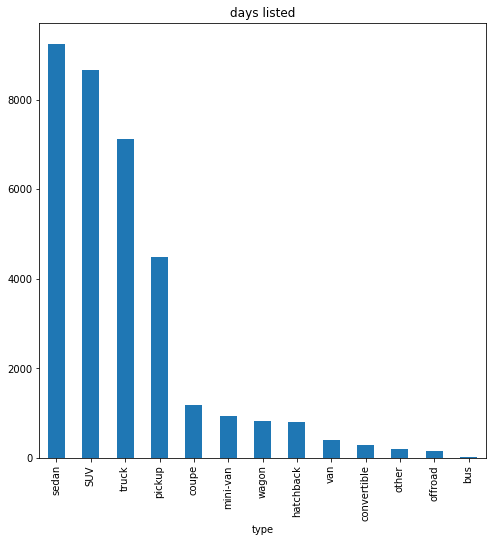

In [36]:
(
    type_data['count_ads']
    .sort_values(ascending = False)
    .plot(kind = 'bar',title   = 'days listed')
)

Let's take **sedan** and **SUV** types for further analysis.
To understand what factors most affect the **price**, let's look at the correlation.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Yes, it is correct decision to continue your analysis with these two type of cars.
</div>

In [37]:
print(vehicles.corr()['price'])

price            1.000000
model_year       0.571599
condition        0.298343
cylinders        0.282132
odometer        -0.492411
is_4wd           0.328129
days_listed     -0.003258
year             0.036210
age             -0.568134
day_of_week      0.006369
month           -0.021605
km_per_year      0.285653
ad_short_time    0.009429
median_price     0.875701
ad_long_time    -0.003611
Name: price, dtype: float64


The **age of the car** and **mileage** affect the **price** the most.


Let's take a closer look at the example of the **Sedan** and **SUV**.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Highly predictable and logical results!
</div>

In [38]:
type_sedan = vehicles.query('type == "sedan"')
print('Sedan\n')
print(type_sedan.corr()['price'])

Sedan

price            1.000000
model_year       0.719925
condition        0.342738
cylinders       -0.015477
odometer        -0.666575
is_4wd           0.095163
days_listed      0.002491
year             0.033723
age             -0.715373
day_of_week     -0.005148
month           -0.026766
km_per_year      0.319307
ad_short_time    0.019993
median_price     0.845293
ad_long_time     0.012492
Name: price, dtype: float64


In [39]:
type_SUV   = vehicles.query('type == "SUV"')
print('SUV\n')
print(type_SUV.corr()['price'])

SUV

price            1.000000
model_year       0.699928
condition        0.333054
cylinders       -0.048333
odometer        -0.658362
is_4wd           0.099916
days_listed     -0.021739
year             0.019279
age             -0.696899
day_of_week      0.029451
month           -0.008395
km_per_year      0.323784
ad_short_time    0.013568
median_price     0.898627
ad_long_time    -0.017399
Name: price, dtype: float64


**"Age"** and **"mileage"** are still the main factors influencing price the most, and their influence has become even greater than the average for all ads.

**Age**

/Applications/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



<AxesSubplot:title={'center':'SUV'}, xlabel='age', ylabel='price'>

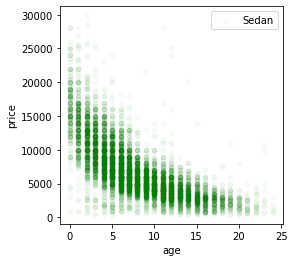

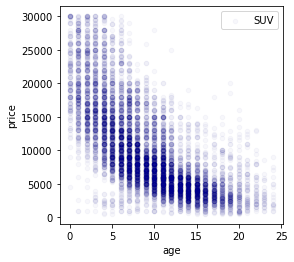

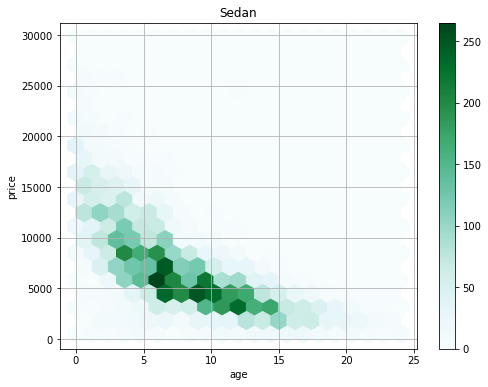

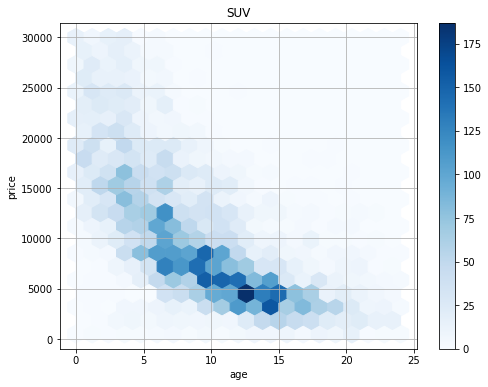

In [40]:
# age, mileage, condition, transmission type, and color.

type_sedan.plot(x = 'age', y = 'price', kind='scatter',figsize=(4, 4),color='Green', label='Sedan', alpha = 0.03)
type_SUV.plot(x = 'age', y = 'price', kind='scatter',figsize=(4, 4),color='Darkblue', label='SUV', alpha = 0.03)
type_sedan.plot(x = 'age', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Sedan')
type_SUV.plot(x = 'age', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title = "SUV",cmap=plt.cm.Blues)


As we can see from the above charts, there is a dependence of the car **price** on **age**. The **sedan** has more data grouping than the **SUV**. **Sedan** has the highest ads for **6** year olds for **6000**, while **SUVs** have the most ads for **12** year olds for **5000**.

**Mileage**

<AxesSubplot:title={'center':'SUV'}, xlabel='odometer', ylabel='price'>

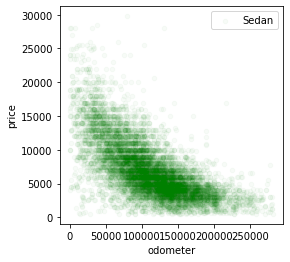

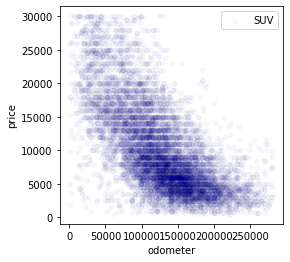

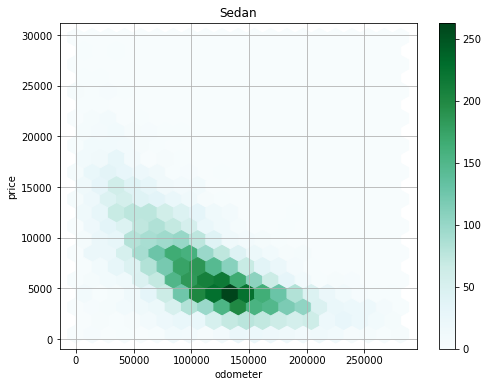

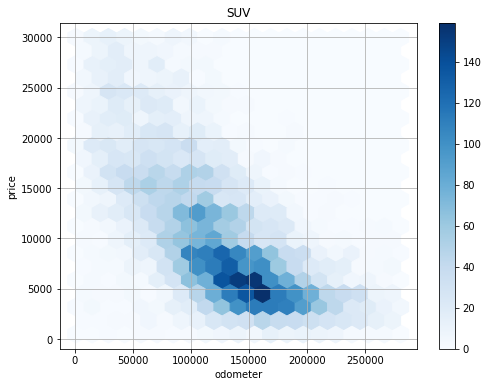

In [41]:
type_sedan.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(4, 4),color='Green', label='Sedan', alpha = 0.03)
type_SUV.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(4, 4),color='Darkblue', label='SUV', alpha = 0.03)
type_sedan.plot(x = 'odometer', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Sedan')
type_SUV.plot(x = 'odometer', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title = "SUV",cmap=plt.cm.Blues)


The dependence of the **price** on **mileage** is also visible. The more **mileage**, the lower the **price** of the car.

**Сondition**

<AxesSubplot:title={'center':'SUV'}, xlabel='condition', ylabel='price'>

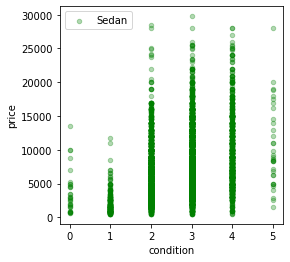

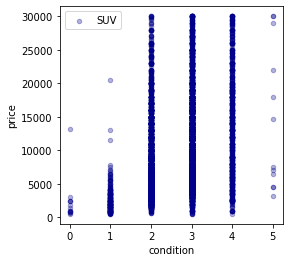

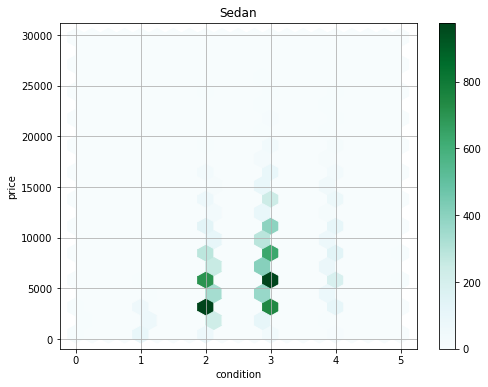

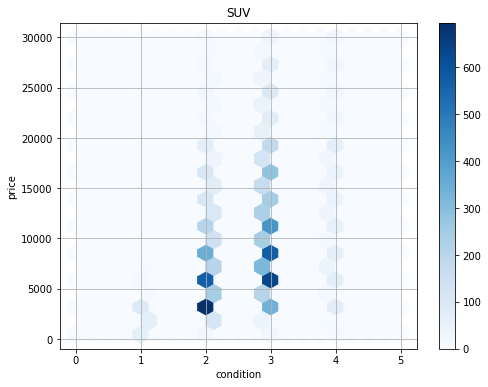

In [42]:
type_sedan.plot(x = 'condition', y = 'price', kind='scatter',figsize=(4, 4),color='Green', label='Sedan', alpha = 0.3)
type_SUV.plot(x = 'condition', y = 'price', kind='scatter',figsize=(4, 4),color='Darkblue', label='SUV', alpha = 0.3)
type_sedan.plot(x = 'condition', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Sedan')
type_SUV.plot(x = 'condition', y = 'price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title = "SUV",cmap=plt.cm.Blues)


As we can see from the graphs, **"condition"** affects the **price**, but not as much as **age** and **mileage**.

    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> You have managed to build a very beautiful visualization! it is great, that you can use the Plotly and Matplotlib libraries for building such colorful graphs.
</div>

Let's consider how the **color** of the car affects the **price**.

#### Sedan
Let's remove from the analysis the colors that appear in less than 50 ads.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

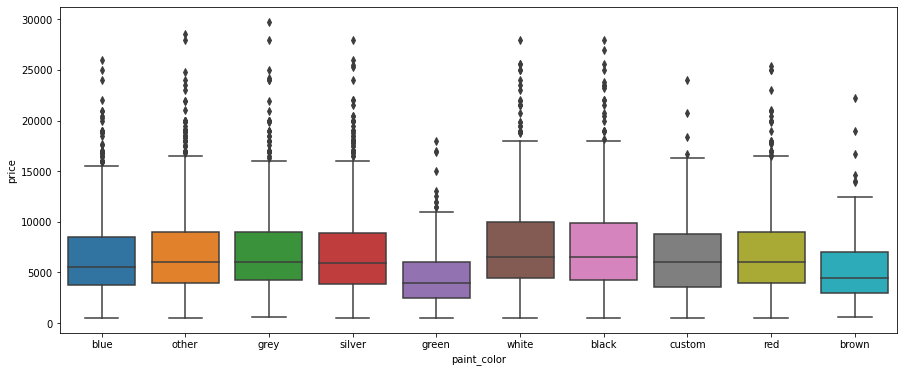

In [43]:
list_of_color = list(
    type_sedan
    .groupby(['paint_color'])['age']
    .count()
    .reset_index()
    .query('age > 50')['paint_color']
    .unique())

plt.figure(figsize = (15,6))
sns.boxplot(
    x = "paint_color"
    , y = "price"
    , data = type_sedan.query('paint_color in @list_of_color')
)


    
<div class="alert alert-block alert-success">
<b>Well done!👍:</b> Boxplots look very nica and informative!
</div>

We can see that **green** sedans are the cheapest, and **white** and **black** are the most expensive.

Let's look to see if the type of transmission affects the value of the car.

<AxesSubplot:xlabel='transmission', ylabel='price'>

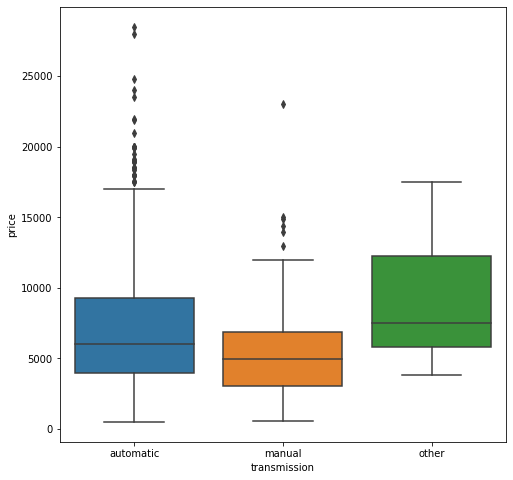

In [44]:
list_of_transmission = list(
    type_sedan
    .groupby(['transmission'])['age']
    .count()
    .reset_index()
    .query('age > 50')['transmission']
    .unique())

sns.boxplot(
    x="transmission"
    , y="price"
    , data=type_sedan.query('paint_color in @list_of_transmission')
)

As we can see, sedans with **automatic** transmission are more expensive and have a larger price range.


#### Let's analyze the SUV

<AxesSubplot:xlabel='paint_color', ylabel='price'>

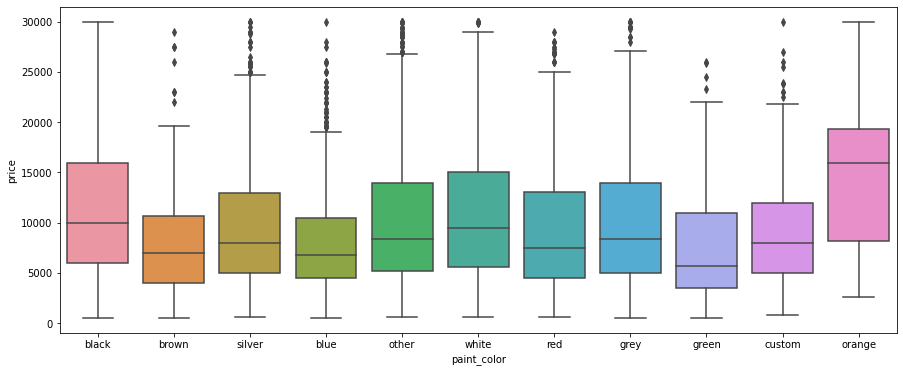

In [45]:
list_of_color = list(
    type_SUV
    .groupby(['paint_color'])['age']
    .count()
    .reset_index()
    .query('age > 50')['paint_color']
    .unique())

plt.figure(figsize=(15,6))
sns.boxplot(
    x="paint_color"
    , y="price"
    , data=type_SUV.query('paint_color in @list_of_color')
)

As we can see, **orange** SUVs are the most expensive, while **blue**, **green** and **brown** are the cheapest.

<AxesSubplot:xlabel='transmission', ylabel='price'>

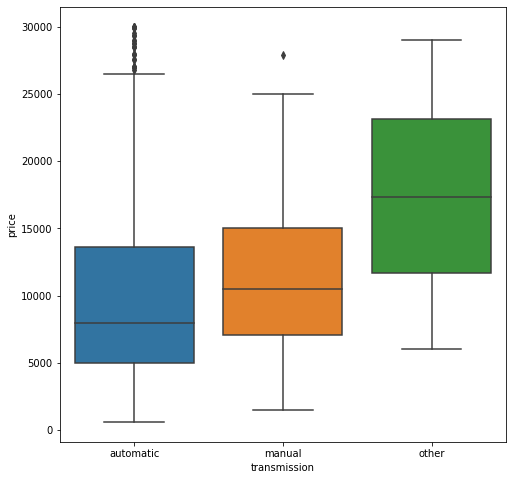

In [46]:
list_of_transmission = list(
    type_SUV
    .groupby(['transmission'])['age']
    .count()
    .reset_index()
    .query('age > 50')['transmission']
    .unique())

sns.boxplot(
    x="transmission"
    , y="price"
    , data=type_SUV.query('paint_color in @list_of_transmission')
)

Unlike sedans, SUVs with a **manual** transmission are more expensive.

### Step 5. Overall conclusion

After analyzing the data obtained, I filled in the missing values, removed duplicates, identified outliers and anomalies.

Further, the factors influencing the price and duration of the ad placement were analyzed.
Most of all, the price is influenced by the age of the car and the mileage, and the number of advertisements is influenced by the season, in winter there are more ads, in summer there are fewer.

It was also found that the most ads for the sale of sedans and SUVs.

### <font color='orange'>The overall review conclusion</font>

Anton, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. And I am glad to say that your project has been accepted! Congratulations!

**Good things and practices in your project I want to highlight🙂**:
* You use different methods for working with your data: you correctly use groupby(),pivot_table(), apply(), query(), unique() and other methods. It is really great that you can apply these methods on practice, keep it up!
* I am really impressed with the automation tools that you use for completing the tasks: you have created very effective functions and you also try to use loops and if-else constructions to get the result you wanted!
* Of course, the big plus is that you have demonstrated the deep understanding of the statistics in this project: you have correctly interpreted and used the median, mean, standard deviation and, of course, correaltion!
* A big plus that you formulated the comprehensive conclusion at each step of analysis and also you have provided the explanation about why you use one or another method/function/way to deal with problems in the data.
* You are absolutely good at visualization! Your graphs look very neat, understandable, clear and simply they are very beautiful!

Good luck at the next sprint!😉

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn